#Задание: Использование и оптимизация дерева решений

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Загрузка данных
data = load_iris()
X = data.data
y = data.target

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание базовой модели дерева решений
base_tree = DecisionTreeClassifier(random_state=42)
base_tree.fit(X_train, y_train)
base_accuracy = cross_val_score(base_tree, X_test, y_test, cv=5).mean()

# Создание настроенной модели дерева решений
tuned_tree = DecisionTreeClassifier(
    criterion='entropy',        # Используем критерий энтропии
    max_depth=3,                # Ограничиваем глубину дерева
    min_samples_split=4,        # Увеличиваем минимальное количество образцов для разделения
    min_samples_leaf=3,         # Увеличиваем минимальное количество образцов в листе
    max_features='auto',        # Ограничиваем количество признаков, рассматриваемых при разделении
    random_state=42
)
tuned_tree.fit(X_train, y_train)
tuned_accuracy = cross_val_score(tuned_tree, X_test, y_test, cv=5).mean()

print(f'Точность базовой модели: {base_accuracy:.4f}')
print(f'Точность настроенной модели: {tuned_accuracy:.4f}')

# Сравнение результатов
if tuned_accuracy > base_accuracy:
    print("Настроенная модель показала лучшую производительность.")
else:
    print("Базовая модель показала лучшую производительность.")


Точность базовой модели: 0.9556
Точность настроенной модели: 1.0000
Настроенная модель показала лучшую производительность.


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

In [2]:
from sklearn.metrics import f1_score, classification_report

# Предсказание на тестовых данных
base_predictions = base_tree.predict(X_test)
tuned_predictions = tuned_tree.predict(X_test)

# Оценка с использованием F1-балла
base_f1 = f1_score(y_test, base_predictions, average='weighted')
tuned_f1 = f1_score(y_test, tuned_predictions, average='weighted')

print(f'F1-балл базовой модели: {base_f1:.4f}')
print(f'F1-балл настроенной модели: {tuned_f1:.4f}')

# Полный отчет по классификации
print("\nОтчет по классификации для базовой модели:")
print(classification_report(y_test, base_predictions))

print("Отчет по классификации для настроенной модели:")
print(classification_report(y_test, tuned_predictions))


F1-балл базовой модели: 1.0000
F1-балл настроенной модели: 1.0000

Отчет по классификации для базовой модели:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Отчет по классификации для настроенной модели:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [3]:
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(random_state=42)

# Оценка модели с использованием кросс-валидации и F1-балла
f1_scores = cross_val_score(tree, X, y, cv=5, scoring='f1_weighted')

print(f'Средний F1-балл: {f1_scores.mean():.4f}')
print(f'Стандартное отклонение F1-балла: {f1_scores.std():.4f}')


Средний F1-балл: 0.9532
Стандартное отклонение F1-балла: 0.0341


In [4]:

# Создание настроенной модели дерева решений
tuned_tree = DecisionTreeClassifier(
    criterion='entropy',        # Используем критерий энтропии
    max_depth=3,                # Ограничиваем глубину дерева
    min_samples_split=4,        # Увеличиваем минимальное количество образцов для разделения
    min_samples_leaf=3,         # Увеличиваем минимальное количество образцов в листе
    max_features='auto',        # Ограничиваем количество признаков, рассматриваемых при разделении
    random_state=42
)

# Оценка модели с использованием кросс-валидации и F1-балла
f1_scores = cross_val_score(tuned_tree, X, y, cv=5, scoring='f1_weighted')

print(f'Средний F1-балл настроенной модели: {f1_scores.mean():.4f}')
print(f'Стандартное отклонение F1-балла: {f1_scores.std():.4f}')


Средний F1-балл настроенной модели: 0.9399
Стандартное отклонение F1-балла: 0.0490


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

#Задание 2: Классификация с использованием набора данных "Вино"

In [25]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns

# Загрузка и разделение данных
wine_data = load_wine()
X = wine_data.data
y = wine_data.target
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X, y, test_size=0.3, random_state=42)



In [14]:
from tqdm import tqdm_notebook

In [21]:
loss_train = []
loss_test = []
iter = []
for md in tqdm_notebook(range(1, 101)):
  dtc = DecisionTreeClassifier(max_depth = md)
  dtc.fit(X_train_wine, y_train_wine)
  y_pred = dtc.predict(X_train_wine)
  y_pred_test = dtc.predict(X_test_wine)
  loss_train.append(1-accuracy_score(y_train_wine, y_pred))
  loss_test.append(1-accuracy_score(y_test_wine, y_pred_test))
  iter.append(md)

<ipython-input-21-0f35fe073767>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for md in tqdm_notebook(range(1, 101)):


  0%|          | 0/100 [00:00<?, ?it/s]

<Axes: >

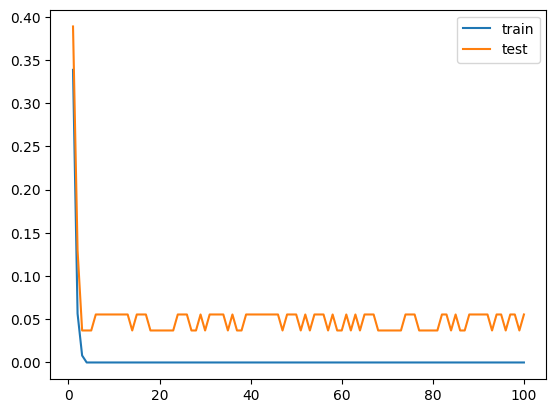

In [22]:
sns.lineplot(x=iter, y=loss_train, label='train')
sns.lineplot(x=iter, y=loss_test, label='test')

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_wine, y_train_wine)
y_pred = rfc.predict(X_test_wine)
accuracy = accuracy_score(y_test_wine, y_pred)
f1 = f1_score(y_test_wine, y_pred, average='weighted')

In [31]:
accuracy, f1

(1.0, 1.0)

In [12]:
accuracy_score(y_test_wine, y_pred)

0.9444444444444444

# Задание 3: Классификация пациентов по набору данных "Breast Cancer"

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Загрузка данных
cancer_data = load_breast_cancer()
X_cancer = cancer_data.data
y_cancer = cancer_data.target

# Разделение данных
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)


# Задание 4: Классификация с использованием набора данных "Digits"

In [33]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Загрузка данных
digits_data = load_digits()
X_digits = digits_data.data
y_digits = digits_data.target

# Разделение данных
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size=0.3, random_state=42)


In [35]:
X_digits.shape

(1797, 64)

In [47]:
loss_train = []
loss_test = []
iter = []
for md in tqdm_notebook(range(1, 201)):
  dtc = DecisionTreeClassifier(max_depth = md)
  dtc.fit(X_train_digits, y_train_digits)
  y_pred_trian = dtc.predict(X_train_digits)
  y_pred_test = dtc.predict(X_test_digits)
  loss_train.append(1-accuracy_score(y_train_digits, y_pred_trian))
  loss_test.append(1-accuracy_score(y_test_digits, y_pred_test))
  iter.append(md)
  #   dtc = DecisionTreeClassifier(max_depth = md)
  #   dtc.fit(X_train_wine, y_train_wine)
  #   y_pred = dtc.predict(X_train_wine)
  #   y_pred_test = dtc.predict(X_test_wine)
  #   loss_train.append(1-accuracy_score(y_train_wine, y_pred))
  #   loss_test.append(1-accuracy_score(y_test_wine, y_pred_test))
  #   iter.append(md)

<ipython-input-47-e9827637ceb1>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for md in tqdm_notebook(range(1, 201)):


  0%|          | 0/200 [00:00<?, ?it/s]

In [45]:
accuracy_score(y_train_digits, y_pred_trian), accuracy_score(y_test_digits, y_pred_test)

(0.9745425616547335, 0.85)

<Axes: >

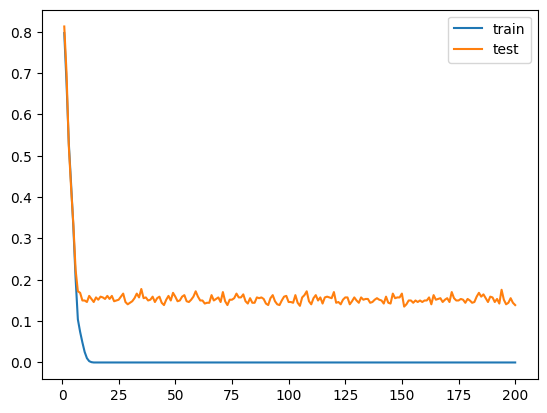

In [48]:
sns.lineplot(x=iter, y=loss_train, label='train')
sns.lineplot(x=iter, y=loss_test, label='test')

In [55]:
loss_train = []
loss_test = []
iter = []
for ne in tqdm_notebook(range(1, 50,2)):
  rfc = RandomForestClassifier(max_depth = ne, n_estimators=100)
  rfc.fit(X_train_digits, y_train_digits)
  y_pred_trian = rfc.predict(X_train_digits)
  y_pred_test = rfc.predict(X_test_digits)
  loss_train.append(1-accuracy_score(y_train_digits, y_pred_trian))
  loss_test.append(1-accuracy_score(y_test_digits, y_pred_test))
  iter.append(ne)

<ipython-input-55-752607838bcc>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ne in tqdm_notebook(range(1, 50,2)):


  0%|          | 0/25 [00:00<?, ?it/s]

<Axes: >

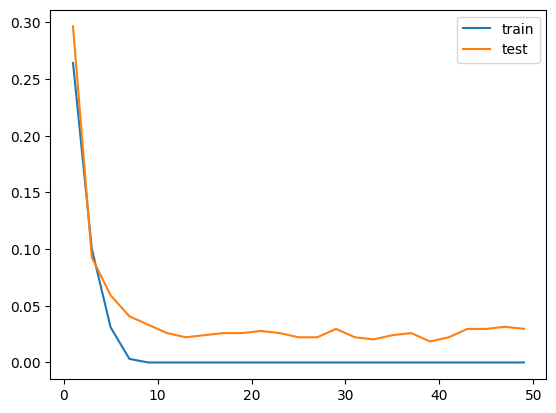

In [56]:
sns.lineplot(x=iter, y=loss_train, label='train')
sns.lineplot(x=iter, y=loss_test, label='test')

In [57]:
rfc = RandomForestClassifier(max_depth = ne, n_estimators=100)
rfc.fit(X_train_digits, y_train_digits)
y_pred_trian = rfc.predict(X_train_digits)
y_pred_test = rfc.predict(X_test_digits)
accuracy_score(y_test_digits, y_pred_test)

0.9777777777777777

# Задание 5 : Регрессия с использованием набора данных "California Housing"

In [59]:
from sklearn.datasets import fetch_california_housing

In [2]:
import pandas as pd

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

# Загрузка данных
california_data = pd.read_csv('/content/housing.csv')
california_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
california_data = pd.get_dummies(california_data, columns=['ocean_proximity'])

In [22]:
california_data = california_data[~(california_data.total_bedrooms.isna())]

In [23]:
X_california = california_data.drop('median_house_value', axis=1)
y_california = california_data.median_house_value

# Разделение данных
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.3, random_state=42)


In [24]:
(X_train_california.isna()).sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [27]:
rfr = RandomForestRegressor(max_depth=20, n_estimators = 500)
rfr.fit(X_train_california, y_train_california)
y_pred_test = rfr.predict(X_test_california)

In [28]:
mean_absolute_percentage_error(y_test_california, y_pred_test)

0.17683042872016727

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
parameters = {'max_depth':[5,10,15,25,50], 'n_estimators': [10,20,40,100]}

rfr = RandomForestRegressor()
clf = GridSearchCV(rfr, parameters, cv=5)
clf.fit(X_train_california, y_train_california)

KeyboardInterrupt: 